In [6]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('/home/leo0419/Desktop/emotions.csv')
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [8]:
dt = df['label']

In [9]:
df = df.drop('label',axis=1)

In [11]:
from sklearn import model_selection
X_train,X_test,y_train,y_test = model_selection.train_test_split(df,dt,test_size=0.3,random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")
parameters = {'max_depth':np.arange(2,10,2)}
KNN_classifier = KNeighborsClassifier(n_neighbors=9)  
KNN_classifier.fit(X_train, y_train)
y_pred = KNN_classifier.predict(X_test)

In [19]:
%%time
model = KNeighborsClassifier()

CPU times: user 124 µs, sys: 10 µs, total: 134 µs
Wall time: 155 µs


In [20]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

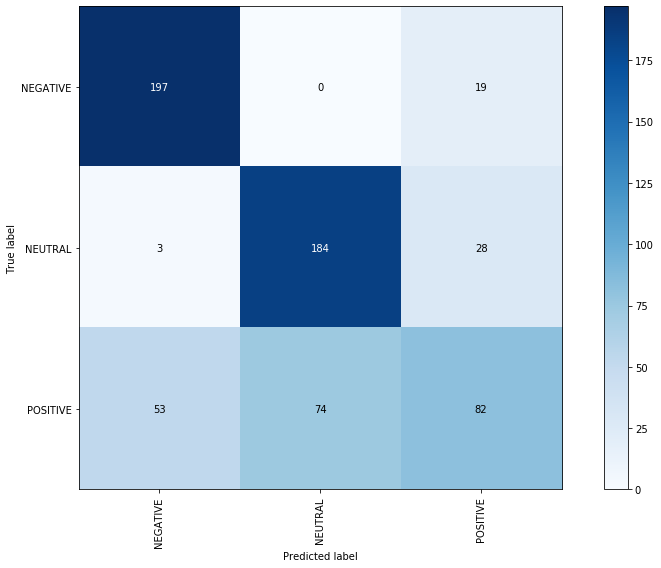

In [21]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(y_test,y_pred))
print('accuracy:')
accuracy

Classification Report
              precision    recall  f1-score   support

    NEGATIVE       0.78      0.91      0.84       216
     NEUTRAL       0.71      0.86      0.78       215
    POSITIVE       0.64      0.39      0.49       209

    accuracy                           0.72       640
   macro avg       0.71      0.72      0.70       640
weighted avg       0.71      0.72      0.70       640

accuracy:


0.7234375